<a href="https://colab.research.google.com/github/ghkdwnwsdud/AI-Project/blob/main/AI_project_week1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to WEEK 1 of SWE3032
### Tutorial using Titanic dataset

This week we'll learn how to load the Titanic survivor dataset available on [Kaggle](https://www.kaggle.com/c/titanic/data) and explore the daset with visualization.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Titanic-Cobh-Harbour-1912.JPG/330px-Titanic-Cobh-Harbour-1912.JPG)

https://www.kaggle.com/c/titanic/data

The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: **“what sorts of people were more likely to survive?”** using passenger data (ie name, age, gender, socio-economic class, etc).


### Today's agenda

1. Load datasets and packages to use
2. Understand the datasets (# of cols & rows, type of dataset)
3. Treat null datas
4. Exploratory data analysis (EDA)
5. Discover a new pattern using aggregation function

### 1. Load datasets and packages

In [4]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
import io
import warnings

warnings.filterwarnings(action='ignore')

In [5]:
# import the Titanic dataset as a training dataset
uploaded = files.upload()
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train.csv


### 2. Understand the datasets (# of cols & rows, type of dataset)

In [6]:
train.shape

(891, 12)

In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


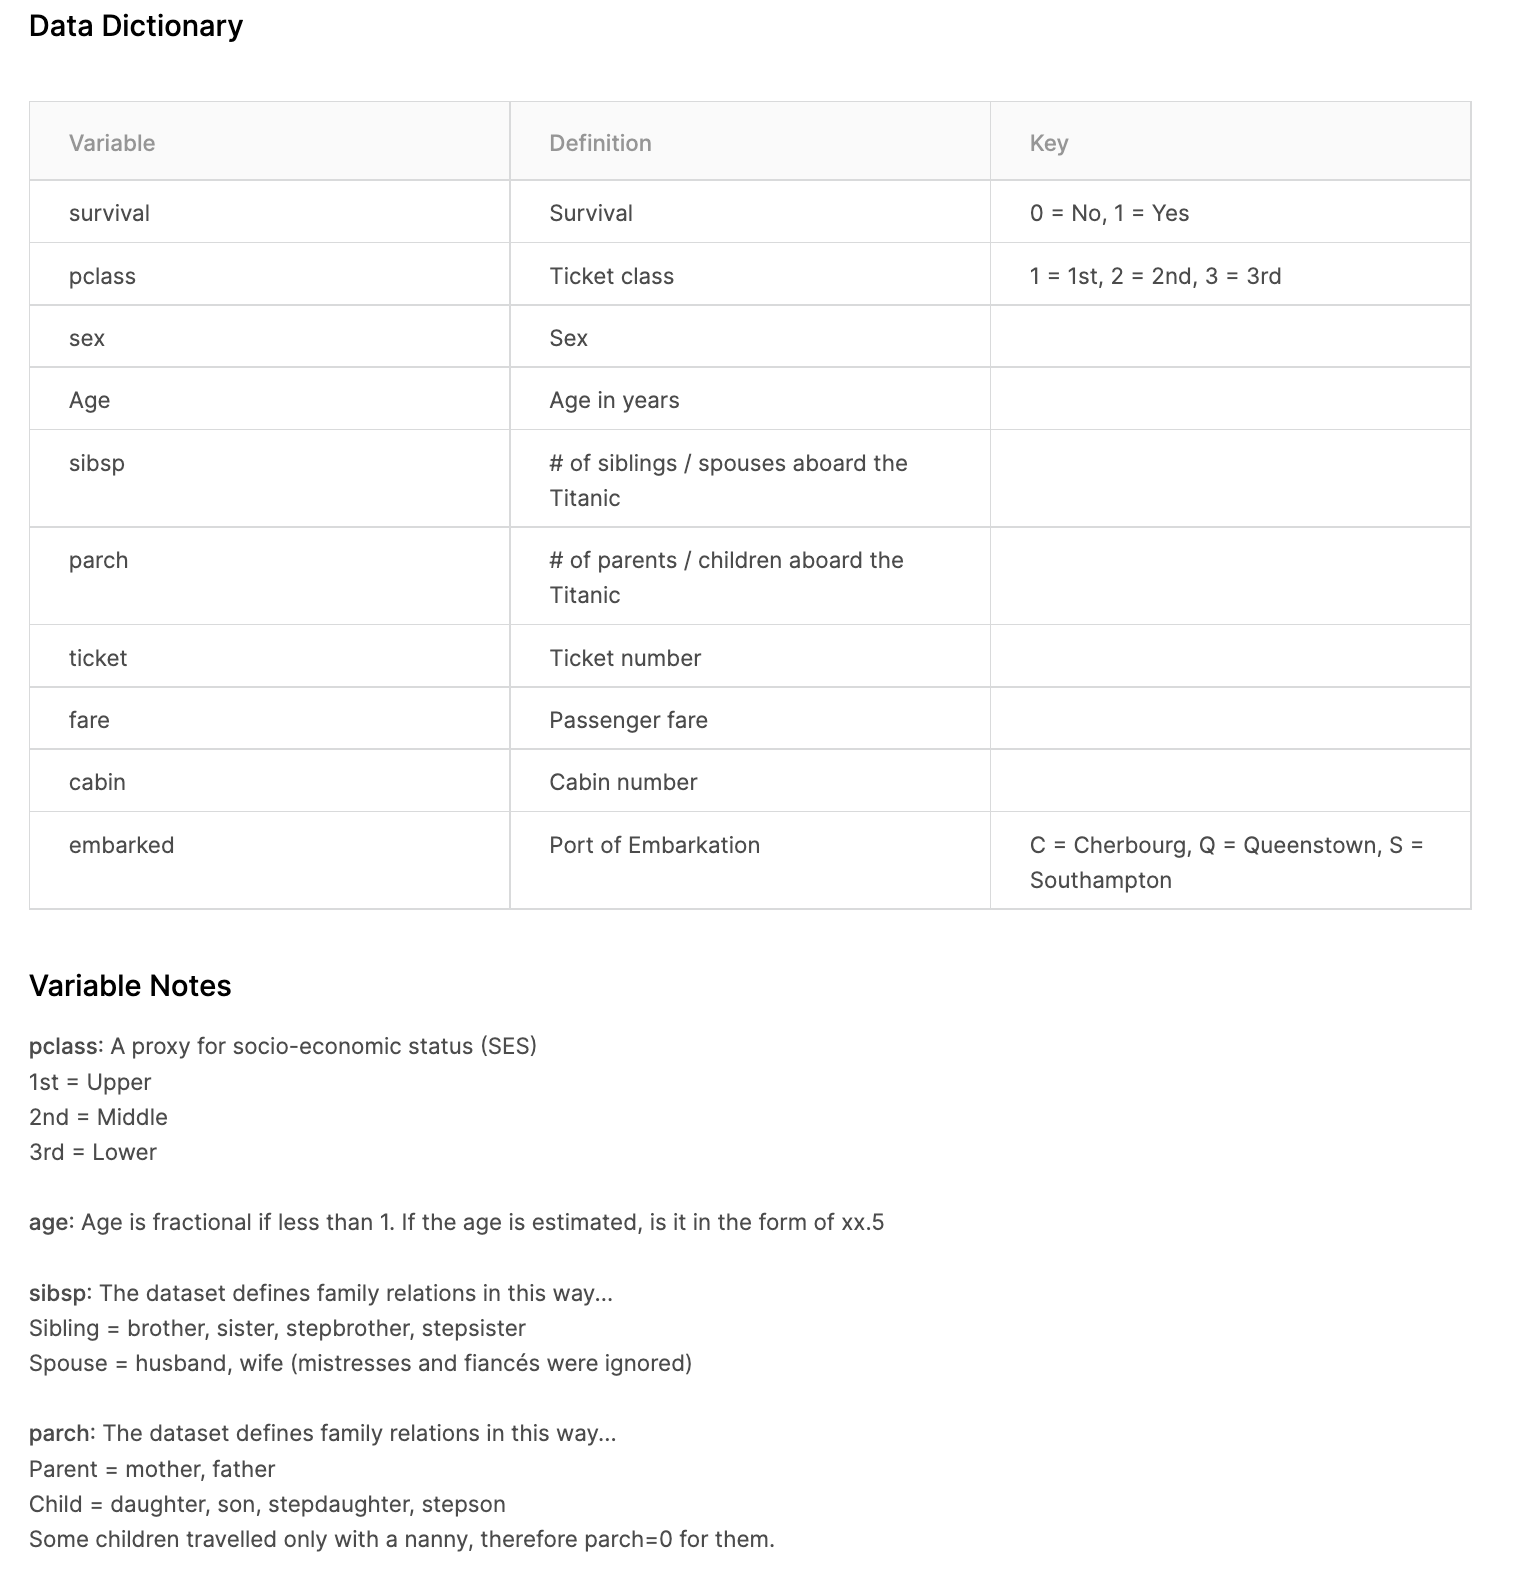

### 3. Treat null datas

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train.loc[0, 'Age'] #loc -> 원하는 데이터 찾아볼 수 있음

22.0

In [11]:
# fill the nan values withs mean values.
train['Age'].fillna(train['Age'].mean(), inplace = False)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

결측치를 평균값으로 대체

In [12]:
train.isnull().sum()
# train['Age'] = train['Age'].fillna(train['Age'].mean(), inplace = False)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# fill the nan values withs mean values.
train['Age'].fillna(train['Age'].mean(), inplace = True)
train['Age'].isnull().sum()

0

inplace = True를 사용하면 train['Age'] = 과 같이 할당해줄 필요가 없음 ( 그냥 train['Age'].fillna를 통해서 바로 결측치를 평균값으로 대체 가능

In [14]:
uploaded = files.upload()
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
print(test.shape)

Saving test.csv to test.csv
(418, 11)


In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
test['Age'].fillna(train['Age'].mean(), inplace = True)
print(test['Age'].isnull().sum())

0


### Problem 1 (1 point)
#### To replace the null values of the variable Embarked , choose your own method(most frequent embarked data, or else)

In [17]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

(평균값 대신에 가장 많이 있는 값을 사용)

In [19]:
# train dataset
MFE = train['Embarked'].value_counts().idxmax()
train['Embarked'].fillna(MFE, inplace = True)
# test dataset
MFE2 = test['Embarked'].value_counts().idxmax()
test['Embarked'].fillna(MFE2, inplace = True)

In [20]:
print('# of NULL data of the variable Embarked in the train dataset: ', train['Embarked'].isnull().sum())
print('# of NULL data of the variable Embarked in the test dataset: ', test['Embarked'].isnull().sum())

# of NULL data of the variable Embarked in the train dataset:  0
# of NULL data of the variable Embarked in the test dataset:  0


### 4. Preprocess dataset (+ indexing)

In [21]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [22]:
print('How many male passenger were on Titanic ?')
print(len(train.loc[train['Sex'] == 'male']))   #len으로 개수 파악

How many male passenger were on Titanic ?
577


In [23]:
train.loc[train['Sex'] == 'male', 'Sex'] = 0
train.loc[train['Sex'] == 'female', 'Sex'] = 1

자연어로 된 data를 카테고리컬 data인 숫자로 바꿔줌

In [24]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C


In [25]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
train = train.replace({'S':0,'C': 1, 'Q':2})
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1


In [27]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

### Problem 2 (1 point)
How many female passenger whose age is less than 30?

In [28]:
print(len(train.loc[(train['Sex'] == 1) & (train['Age'] <= 30)]))

211


### 5. Exploratory data analysis (EDA)
Let's explore the datasets to answer some interesting questions such as which kind of people are likely to survive?

<Axes: xlabel='Embarked', ylabel='count'>

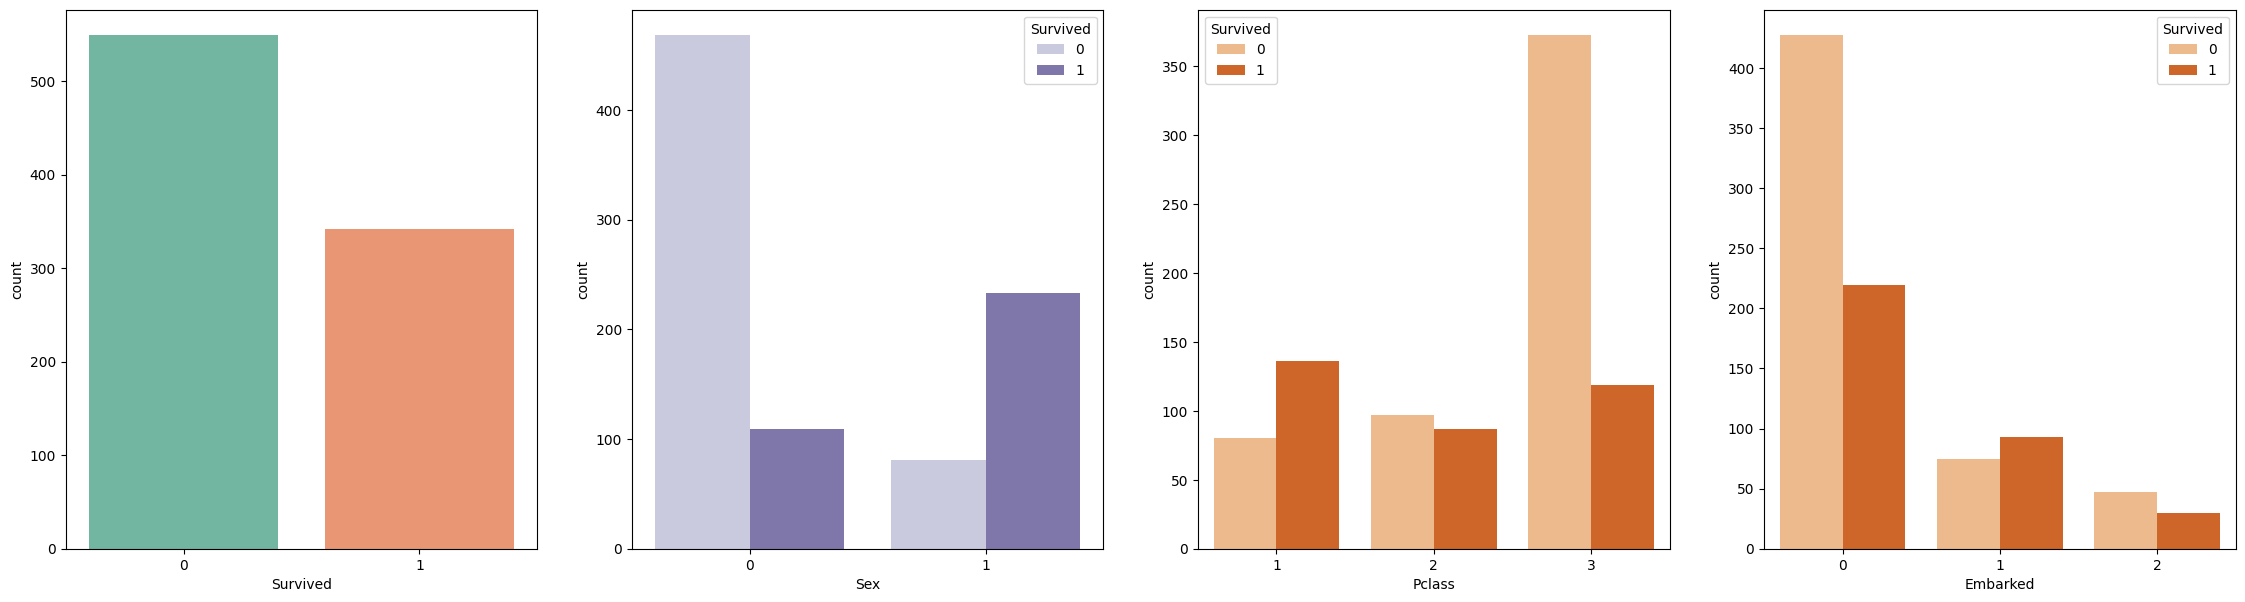

In [29]:
fig, ax = plt.subplots(1,4,figsize=(28, 7))
sns.countplot(x=train.Survived, palette="Set2", ax=ax[0])
sns.countplot(x=train.Sex, hue=train.Survived, ax=ax[1], palette="Purples")
sns.countplot(x=train.Pclass, hue=train.Survived, ax=ax[2], palette="Oranges")
sns.countplot(x=train.Embarked, hue=train.Survived, ax=ax[3], palette="Oranges")

<Axes: xlabel='Survived', ylabel='Age'>

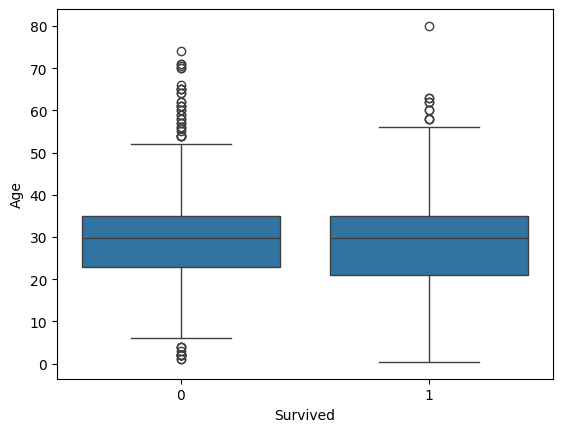

In [24]:
sns.boxplot(data=train, x="Survived", y="Age")

<Axes: xlabel='Survived', ylabel='Age'>

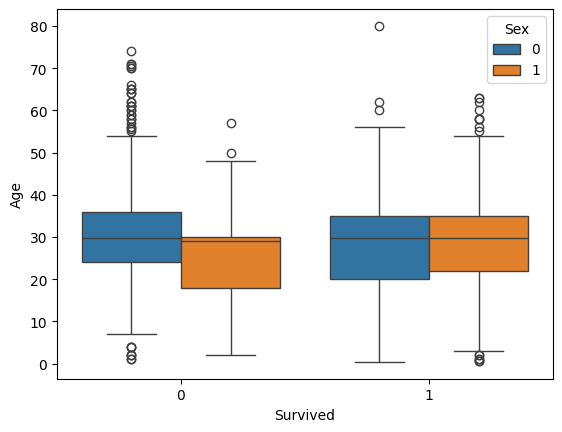

In [25]:
sns.boxplot(data=train, x="Survived", y="Age", hue='Sex')

In [30]:
train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex            0.543351
Age           -0.069809
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked       0.106811
Name: Survived, dtype: float64

0에 가까울수록 pattern 없음, -1에 가까울수록 반비례 상관관계, 1에 가까울수록 상관관계가 있음

<Axes: >

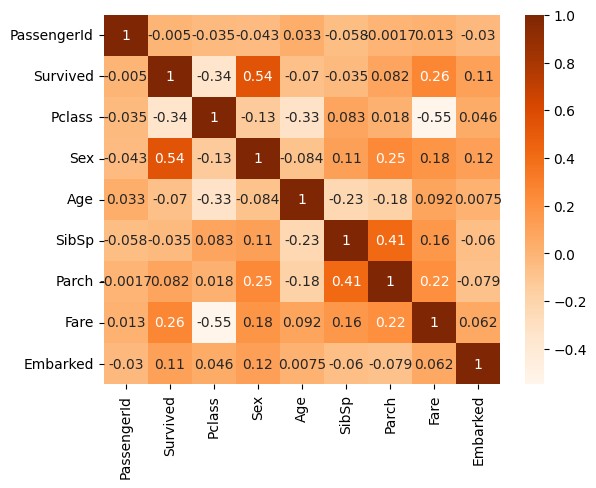

In [31]:
sns.heatmap(train.corr(), annot = True, cmap='Oranges')

### 5. Discover a new pattern using aggregation function

In [32]:
# transform numeric variable age to categorical variable
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['<10', '<20', '<30', '<40', '<50', '<60', '<70', '<80', '<90']
train['Age_cat'] = pd.cut(train['Age'], bins, right=False, labels=labels)

In [33]:
# aggregate how many survived passenger were according to sex and ages
train.groupby(['Sex', 'Age_cat'])['Survived'].sum().unstack('Age_cat')

Age_cat,<10,<20,<30,<40,<50,<60,<70,<80,<90
Sex,,,,,,,,,
0,19,7,41,23,12,4,2,0,1
1,19,34,88,50,22,16,4,0,0


In [34]:
train.groupby(['Sex', 'Age_cat'])['Survived'].sum()

Sex  Age_cat
0    <10        19
     <20         7
     <30        41
     <40        23
     <50        12
     <60         4
     <70         2
     <80         0
     <90         1
1    <10        19
     <20        34
     <30        88
     <40        50
     <50        22
     <60        16
     <70         4
     <80         0
     <90         0
Name: Survived, dtype: int64

In [35]:
# aggregate how many passenger were according to sex and ages
train.groupby(['Sex', 'Age_cat'])['Survived'].count().unstack('Age_cat')

Age_cat,<10,<20,<30,<40,<50,<60,<70,<80,<90
Sex,,,,,,,,,
0,32,57,272,107,57,30,15,6,1
1,30,45,125,60,32,18,4,0,0


In [32]:
# aggregate how many passenger were according to sex and ages
train.groupby(['Sex', 'Age_cat'])['Survived'].sum().unstack('Age_cat')

Age_cat,<10,<20,<30,<40,<50,<60,<70,<80,<90
Sex,,,,,,,,,
0,19,7,41,23,12,4,2,0,1
1,19,34,88,50,22,16,4,0,0


In [33]:
# Ratio =  Number of survived paseengers / Number of paseengers
round(train.groupby(['Sex', 'Age_cat'])['Survived'].sum().unstack('Age_cat')/train.groupby(['Sex', 'Age_cat'])['Survived'].count().unstack('Age_cat'), 2)

Age_cat,<10,<20,<30,<40,<50,<60,<70,<80,<90
Sex,,,,,,,,,
0,0.59,0.12,0.15,0.21,0.21,0.13,0.13,0.0,1.0
1,0.63,0.76,0.70,0.83,0.69,0.89,1.00,NaN,NaN


->성별당 해당 연령대의 생존비율을 알 수 있음

In [34]:
train['Age_<10']= np.where(train['Age'] <10, 1, 0)

In [35]:
train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex            0.543351
Age           -0.069809
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked       0.108669
Age_<10        0.128812
Name: Survived, dtype: float64